In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Algerian_forest_fires_cleaned_dataset2.csv")
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [3]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [4]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [5]:
df.drop(['day',	'month'	,'year'],axis=1,inplace=True)

In [6]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [7]:
df['Classes']=np.where(df['Classes']=='fire',1,0)

In [8]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [9]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [10]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [11]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((194, 11), (49, 11), (194,), (49,))

In [16]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
206,34,40,18,0.0,92.1,56.3,157.5,14.3,59.5,1,1
154,34,56,17,0.1,84.7,9.7,27.3,4.7,10.3,1,1
124,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0,1
29,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,1,0
140,32,67,14,4.5,64.6,4.4,8.2,1.0,4.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
130,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,0,1
134,30,52,15,2.0,72.3,11.4,7.8,1.4,10.9,0,1
155,34,58,18,0.0,88.0,13.6,36.8,8.0,14.1,1,1


In [17]:
corr_matrix=x_train.corr()
corr_matrix

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656957,-0.257403,-0.335232,0.685635,0.493681,0.409331,0.607424,0.476957,0.531608,0.246444
RH,-0.656957,1.000000,0.189727,0.214901,-0.648051,-0.418886,-0.245043,-0.686134,-0.368322,-0.446870,-0.370195
Ws,-0.257403,0.189727,1.000000,0.184737,-0.141475,0.016477,0.068511,0.054516,0.038304,-0.009962,-0.118533
Rain,-0.335232,0.214901,0.184737,1.000000,-0.537996,-0.289123,-0.302638,-0.357214,-0.301873,-0.375158,-0.006417
FFMC,0.685635,-0.648051,-0.141475,-0.537996,1.000000,0.599867,0.511770,0.752568,0.591708,0.762805,0.169071
DMC,0.493681,-0.418886,0.016477,-0.289123,0.599867,1.000000,0.871976,0.701233,0.981911,0.576028,0.180193
DC,0.409331,-0.245043,0.068511,-0.302638,0.511770,0.871976,1.000000,0.530842,0.939080,0.508731,-0.085873
ISI,0.607424,-0.686134,0.054516,-0.357214,0.752568,0.701233,0.530842,1.000000,0.669325,0.755753,0.240565
BUI,0.476957,-0.368322,0.038304,-0.301873,0.591708,0.981911,0.939080,0.669325,1.000000,0.580451,0.078415
Classes,0.531608,-0.446870,-0.009962,-0.375158,0.762805,0.576028,0.508731,0.755753,0.580451,1.000000,0.126895


<AxesSubplot: >

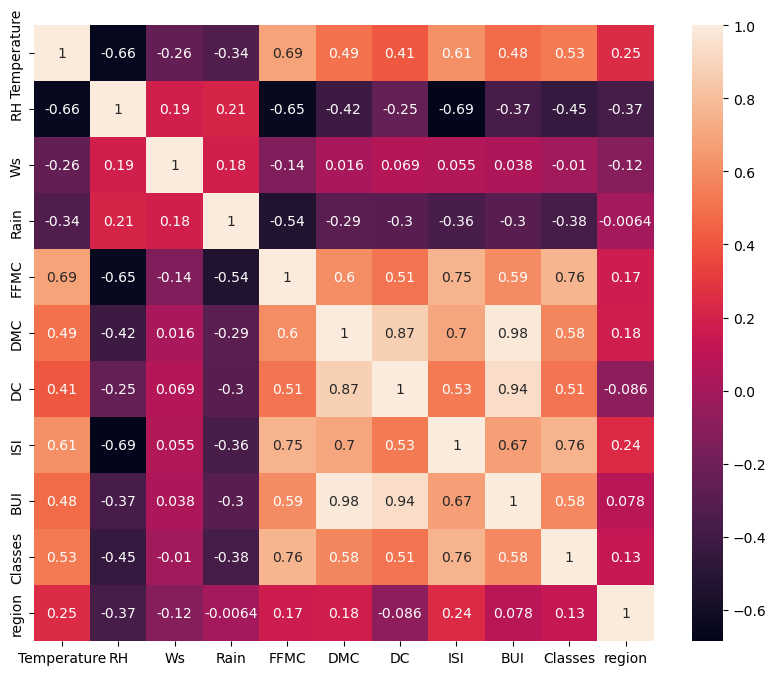

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)

## delete collinear features

In [19]:
def del_col(x_train,thtreshold):
    features=set()
    cor_mat=x_train.corr()
    for i in range(len(cor_mat.columns)):
        for j in range(i):
#            print(j,i)
            if abs(cor_mat.iloc[i,j])>thtreshold:
                col_name=cor_mat.columns[j]
                features.add(col_name)
    return features

In [20]:
del_col(x_train,0.9)

{'DC', 'DMC'}

In [21]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
206,34,40,18,0.0,92.1,56.3,157.5,14.3,59.5,1,1
154,34,56,17,0.1,84.7,9.7,27.3,4.7,10.3,1,1
124,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0,1
29,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,1,0
140,32,67,14,4.5,64.6,4.4,8.2,1.0,4.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
130,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,0,1
134,30,52,15,2.0,72.3,11.4,7.8,1.4,10.9,0,1
155,34,58,18,0.0,88.0,13.6,36.8,8.0,14.1,1,1


In [22]:
x_train.drop(['DC', 'DMC'],axis=1,inplace=True)

In [23]:
x_train.reset_index()

,index,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,Classes,region
0,206,34,40,18,0.0,92.1,14.3,59.5,1,1
1,154,34,56,17,0.1,84.7,4.7,10.3,1,1
2,124,29,80,14,2.0,48.7,0.3,2.6,0,1
3,29,33,50,14,0.0,88.7,7.2,28.3,1,0
4,140,32,67,14,4.5,64.6,1.0,4.2,0,1
...,...,...,...,...,...,...,...,...,...,...
189,3,25,89,13,2.5,28.6,0.0,1.7,0,0
190,130,27,59,18,0.1,78.1,2.4,8.3,0,1
191,134,30,52,15,2.0,72.3,1.4,10.9,0,1
192,155,34,58,18,0.0,88.0,8.0,14.1,1,1


In [24]:
x_test.drop(['DC', 'DMC'],axis=1,inplace=True)

In [25]:
x_test.reset_index()

,index,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,Classes,region
0,151,34,42,15,1.7,79.7,2.2,11.5,0,1
1,31,27,75,19,1.2,55.7,0.8,2.8,0,0
2,48,35,59,17,0.0,88.1,7.7,18.2,1,0
3,61,36,45,14,0.0,78.8,2.0,4.7,0,0
4,238,30,65,14,0.0,85.4,4.5,16.9,1,1
5,230,36,33,13,0.1,90.6,9.0,28.2,1,1
6,101,33,73,12,1.8,59.9,0.7,2.7,0,0
7,147,36,62,16,0.0,87.8,7.0,16.4,1,1
8,194,35,34,16,0.2,88.3,7.5,17.5,1,1
9,106,24,82,15,0.4,44.9,0.2,1.4,0,0


In [26]:
x_train.shape,x_test.shape

((194, 9), (49, 9))

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [29]:
x_train_scaled

array([[ 0.54242424, -1.54663987,  0.89337725, ...,  2.90805735,
         0.89235436,  1.02083557],
       [ 0.54242424, -0.4452932 ,  0.53380217, ..., -0.46081654,
         0.89235436,  1.02083557],
       [-0.92727273,  1.20672682, -0.54492305, ..., -0.988059  ,
        -1.12063105,  1.02083557],
       ...,
       [-0.63333333, -0.72062986, -0.18534798, ..., -0.41973272,
        -1.12063105,  1.02083557],
       [ 0.54242424, -0.30762486,  0.89337725, ..., -0.20061897,
         0.89235436,  1.02083557],
       [ 1.13030303, -0.51412736, -0.90449813, ...,  0.3403181 ,
         0.89235436, -0.97958969]])

In [30]:
x_test_scaled

array([[ 0.54242424, -1.40897154, -0.18534798,  0.40419044,  0.13734221,
        -0.61731301, -0.37864889, -1.12063105,  1.02083557],
       [-1.51515152,  0.86255598,  1.25295232,  0.17164909, -1.53708909,
        -0.96902733, -0.97436439, -1.12063105, -0.97958969],
       [ 0.83636364, -0.23879069,  0.53380217, -0.38645018,  0.72339316,
         0.7644218 ,  0.08012052,  0.89235436, -0.97958969],
       [ 1.13030303, -1.20246904, -0.54492305, -0.38645018,  0.07455103,
        -0.66755791, -0.84426561, -1.12063105, -0.97958969],
       [-0.63333333,  0.17421431, -0.54492305, -0.38645018,  0.53501964,
        -0.03949664, -0.00889444,  0.89235436,  1.02083557],
       [ 1.13030303, -2.02847904, -0.90449813, -0.3399419 ,  0.89781308,
         1.09101366,  0.76485099,  0.89235436,  1.02083557],
       [ 0.24848485,  0.72488765, -1.2640732 ,  0.45069872, -1.24406361,
        -0.99414978, -0.9812117 , -1.12063105, -0.97958969],
       [ 1.13030303, -0.03228819,  0.1742271 , -0.38645018,  0

In [31]:
## Box plot to understand efefct of standard scalar

/tmp/ipykernel_560/4104899624.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'box plot after scaled')

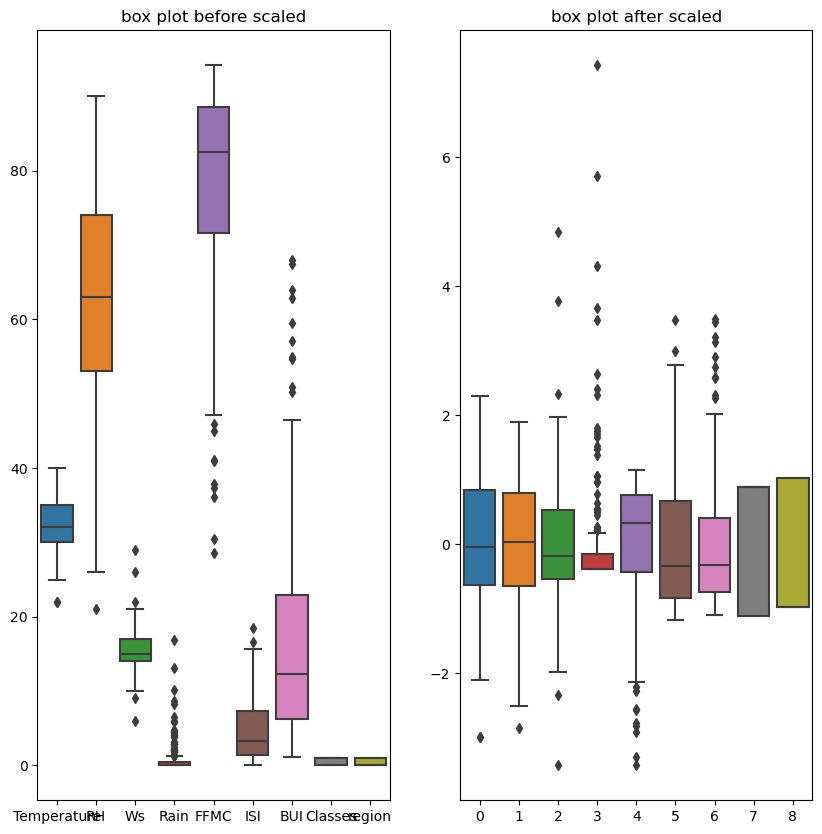

In [32]:
plt.subplots(figsize=(10,10))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.title("box plot before scaled")
plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)
plt.title("box plot after scaled")

#### Linear regressor model

In [48]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train_scaled,y_train)
y_pred=lin_reg.predict(x_test_scaled)

In [49]:
lin_reg.coef_

array([-0.07435604,  0.04725108, -0.02391038,  0.01785151, -0.97007697,
        5.37678596,  3.52841127,  0.11219839, -0.01385427])

In [50]:
lin_reg.intercept_

7.071649484536085

In [51]:
y_pred

array([ 2.04809129, -0.07110512, 10.78329128,  0.18420322,  6.45632342,
       14.68720099, -0.58707805,  9.39195158, 10.23170978, -0.37278332,
        0.09690369,  7.27378189,  0.0449692 , 17.13438026,  0.39865578,
        0.20403831, -0.28635422,  7.08465866, 10.66008153, -0.06753581,
        4.23692986, 25.73430104, 21.3817838 , 27.25373934,  2.06808977,
        4.36684266, -0.35270097,  5.68458994,  7.31866109, 16.55622608,
        0.4208973 ,  0.86375989, 22.72291039, 23.77662919, 15.59704149,
        3.41613794,  7.38660146,  2.72568395,  3.7084164 ,  7.02186407,
       -0.52998706,  0.19548227,  8.32152524,  0.03299392, 21.34246794,
        5.69930339,  9.6116428 ,  5.1954776 ,  5.58194257])

In [52]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute error is ", mae)

Mean absolute error is  0.8512968662713797


In [53]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R2 score is", score)

R2 score is 0.8973604236569233


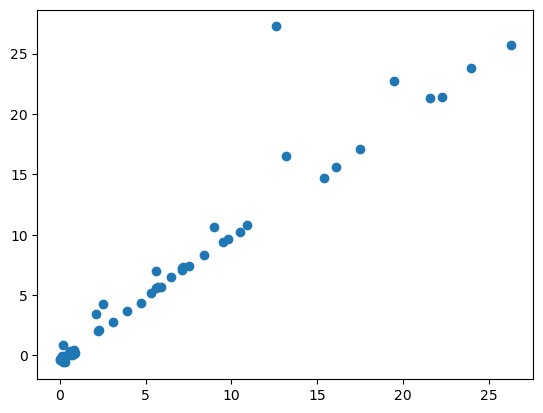

In [54]:
plt.scatter(y_test,y_pred)

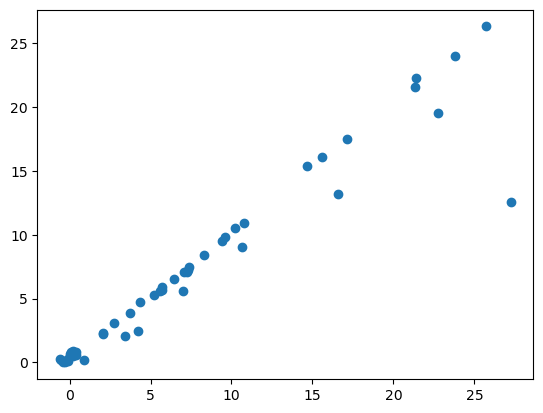

In [55]:
plt.scatter(y_pred,y_test)

### Lasso regression

In [56]:
from sklearn.linear_model import Lasso
Las_reg=Lasso()
Las_reg.fit(x_train_scaled,y_train)
y_pred=Las_reg.predict(x_test_scaled)

In [57]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("r2 score is ", score)
print("mae is ", mae)

r2 score is  0.9210542083663713
mae is  1.1730889574452046


In [58]:
Las_reg.intercept_

7.071649484536084

In [59]:
Las_reg.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        4.13856672,  2.78804624,  0.        ,  0.        ])

In [60]:
Las_reg.alpha

1.0

#### Lasso score is worst than Simple liner regression, and Lasso mean absolute error is higher than simple liner regression model

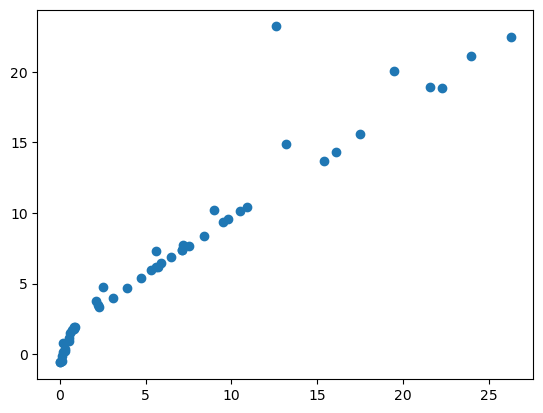

In [61]:
plt.scatter(y_test,y_pred)

In [62]:
from sklearn.linear_model import LassoCV
Las_CV_reg=LassoCV(cv=5) ## default CV is 2
Las_CV_reg.fit(x_train_scaled,y_train)
y_pred=Las_CV_reg.predict(x_test_scaled)

r2 score is  0.9002066084339915
mae is  0.8393235006194903


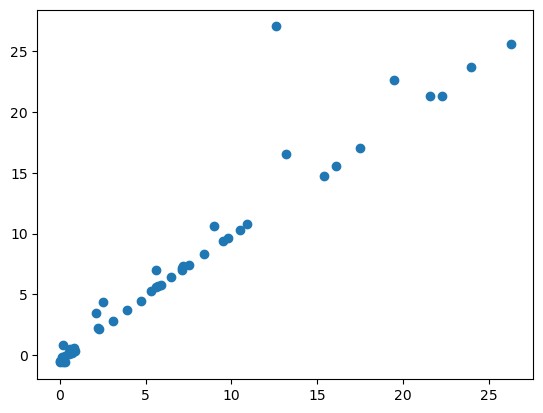

In [63]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("r2 score is ", score)
print("mae is ", mae)
plt.scatter(y_test,y_pred)

In [64]:
Las_CV_reg.coef_

array([-0.05041423,  0.01281506,  0.        ,  0.        , -0.87357465,
        5.28359385,  3.50877627,  0.06114337, -0.        ])

In [65]:
Las_CV_reg.intercept_

7.071649484536085

## Ridge Regression

In [66]:
from sklearn.linear_model import Ridge
Ridge_reg=Ridge()
Ridge_reg.fit(x_train_scaled,y_train)
y_pred=Ridge_reg.predict(x_test_scaled)

r2 score is  0.9005168742345623
mae is  0.8471188018164033


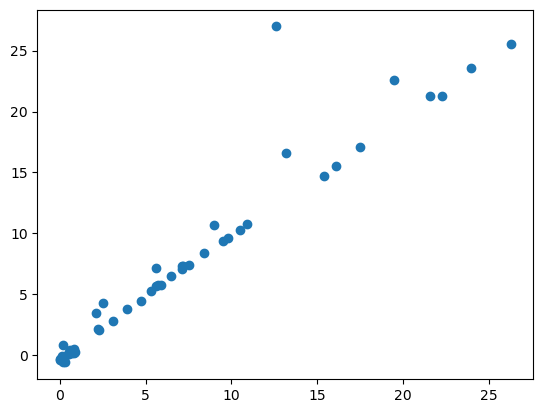

In [67]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("r2 score is ", score)
print("mae is ", mae)
plt.scatter(y_test,y_pred)

In [68]:
Ridge_reg.coef_

array([-6.98288930e-02,  1.16052010e-02, -3.44449596e-03,  1.64604622e-02,
       -9.33169103e-01,  5.26690532e+00,  3.52306166e+00,  1.50264601e-01,
       -9.91536556e-03])

In [69]:
Ridge_reg.intercept_

7.071649484536085

In [70]:
from sklearn.linear_model import RidgeCV
RidgeCV_reg=RidgeCV(cv=5)
RidgeCV_reg.fit(x_train_scaled,y_train)
y_pred=RidgeCV_reg.predict(x_test_scaled)

r2 score is  0.8976944542399148
mae is  0.8507317712641165


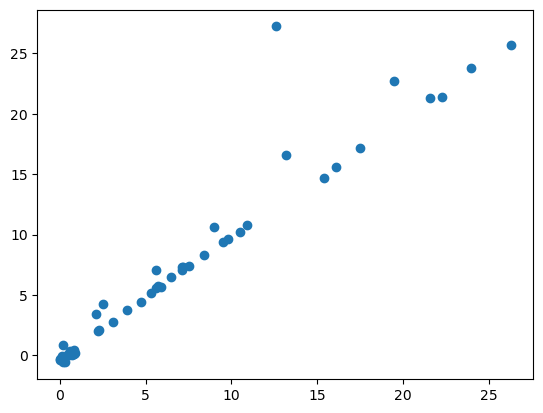

In [71]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("r2 score is ", score)
print("mae is ", mae)
plt.scatter(y_test,y_pred)

In [72]:
RidgeCV_reg.coef_

array([-0.07391853,  0.0435405 , -0.02180596,  0.01770134, -0.96634999,
        5.36547804,  3.52793483,  0.11614111, -0.0134531 ])

In [73]:
RidgeCV_reg.intercept_

7.071649484536085

In [74]:
RidgeCV_reg.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## ElasticNet regression

In [75]:
from sklearn.linear_model import ElasticNet
ElasticNet_reg=ElasticNet()
ElasticNet_reg.fit(x_train_scaled,y_train)
y_pred=ElasticNet_reg.predict(x_test_scaled)

r2 score is  0.8868192057948031
mae is  1.7504761732333527


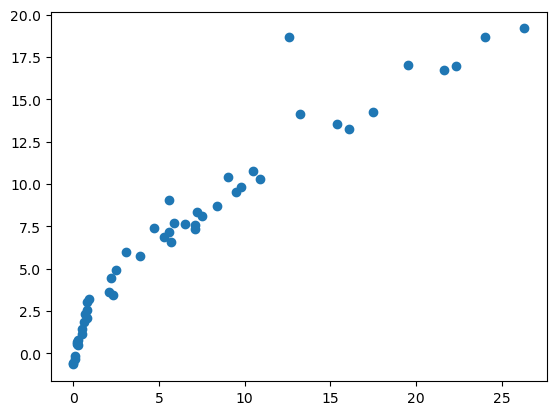

In [76]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("r2 score is ", score)
print("mae is ", mae)
plt.scatter(y_test,y_pred)

In [77]:
ElasticNet_reg.coef_

array([ 0.14421172, -0.39509937,  0.00406717, -0.        ,  0.28023451,
        2.50489068,  2.36209901,  0.78922869,  0.        ])

In [78]:
ElasticNet_reg.intercept_

7.071649484536083

In [79]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV_reg=ElasticNetCV()
ElasticNetCV_reg.fit(x_train_scaled,y_train)
y_pred=ElasticNetCV_reg.predict(x_test_scaled)

r2 score is  0.9022423125116991
mae is  0.8426488711084663


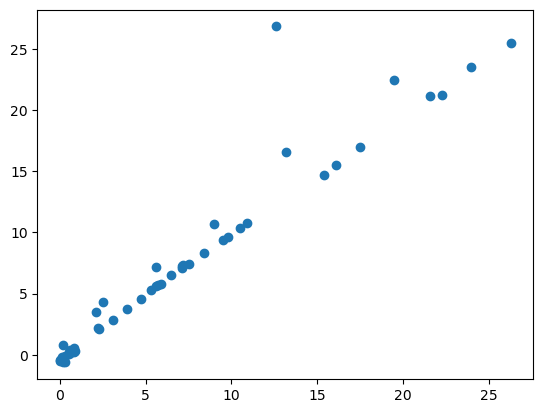

In [80]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("r2 score is ", score)
print("mae is ", mae)
plt.scatter(y_test,y_pred)

In [82]:
ElasticNetCV_reg.coef_

array([-5.91291028e-02,  0.00000000e+00,  6.27052859e-03,  1.18876846e-02,
       -8.88247057e-01,  5.20822893e+00,  3.51329120e+00,  1.45117870e-01,
       -8.27263754e-04])

In [83]:
ElasticNetCV_reg.intercept_

7.071649484536085

## pickle ML model preprocessing standard scalar

In [57]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(Las_reg,open('Las_reg.pkl','wb'))